In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Flag to see the efect of the different normalizations:
flag_plot = True # Set to True to see the plots

# Example dataset
use_X_tr = np.random.rand(100, 112, 112)*10  # (n, 112, 112)
use_X_vl = np.random.rand(20, 112, 112)*10   # (n, 112, 112)
use_X_ts = np.random.rand(30, 112, 112)*10   # (n, 112, 112)


In [38]:
def plot_comparison(use_X, nrm_X, instances=3):
    """
    Plots unnormalized and normalized images side-by-side for a given number of instances.

    Args:
    - use_X: Unnormalized dataset of shape (n, 112, 112).
    - nrm_X: Normalized dataset of shape (n, 112, 112).
    - instances: Number of instances to plot (default: 3).
    """
    for instance_idx in range(instances):
        plt.figure(figsize=(7, 2))  # Adjust the figure size for side-by-side images
        
        # Plot the unnormalized image (left)
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        plt.imshow(use_X[instance_idx], cmap='viridis')  # Customize cmap if needed
        plt.colorbar()
        plt.title(f"Unnormalized (Instance {instance_idx + 1})")
        plt.axis('off')  # Hide axes for clarity
        
        # Plot the normalized image (right)
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        plt.imshow(nrm_X[instance_idx], cmap='viridis')  # Same cmap as above
        plt.colorbar()
        plt.title(f"Normalized (Instance {instance_idx + 1})")
        plt.axis('off')  # Hide axes for clarity
        
        # Add a super-title for the instance
        plt.suptitle(f"Instance {instance_idx + 1} Comparison", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit super-title
        plt.show()


In [39]:
# Normalize using the "dataset" min and max:
def get_med_of_min_and_max_of_dataset(X):
    # Compute global mins and maxs across the entire dataset
    mins = np.min(X) 
    maxs = np.max(X)
    
    # Compute the median of mins and maxs
    med_of_mins = np.median(mins)
    med_of_maxs = np.median(maxs)
    
    return med_of_mins, med_of_maxs

def norm_ins_by_dataset(X, med_of_mins, med_of_maxs):
    # Normalize the entire dataset using the medians
    return (X - med_of_mins) / (med_of_maxs - med_of_mins)

# Usage:
med_of_mins_tr, med_of_maxs_tr = get_med_of_min_and_max_of_dataset(use_X_tr)

nrm_X_tr = norm_ins_by_dataset(use_X_tr, med_of_mins_tr, med_of_maxs_tr)
nrm_X_vl = norm_ins_by_dataset(use_X_vl, med_of_mins_tr, med_of_maxs_tr)
nrm_X_ts = norm_ins_by_dataset(use_X_ts, med_of_mins_tr, med_of_maxs_tr)


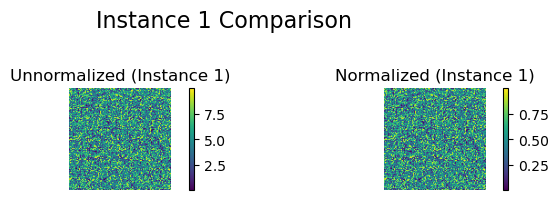

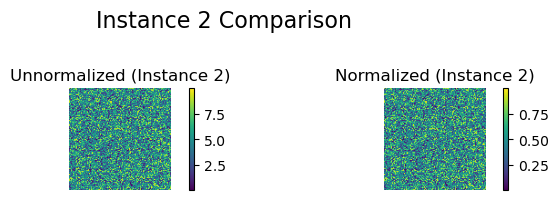

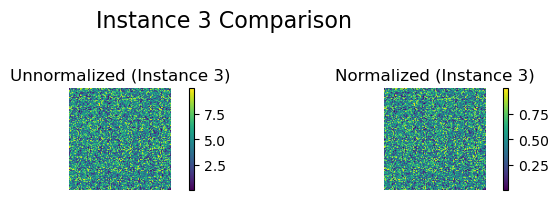

In [40]:
# Call the comparer:
if flag_plot: plot_comparison(use_X_vl, nrm_X_vl, instances=3)

In [41]:
# Normalize using the "single-image" min and max:
def get_mins_and_maxs_of_images(X):
    # Compute mins and maxs for each individual image
    mins = np.min(X, axis=(2), keepdims=True)  # Shape (n, 1)
    maxs = np.max(X, axis=(2), keepdims=True)  # Shape (n, 1)
    return mins, maxs

def norm_ins_by_single_image(X, mins, maxs):
    # Normalize each image individually
    return (X - mins) / (maxs - mins)

# Usage:
mins_tr, maxs_tr = get_mins_and_maxs_of_images(use_X_tr)
mins_vl, maxs_vl = get_mins_and_maxs_of_images(use_X_vl)
mins_ts, maxs_ts = get_mins_and_maxs_of_images(use_X_ts)

nrm_X_tr = norm_ins_by_single_image(use_X_tr, mins_tr, maxs_tr)
nrm_X_vl = norm_ins_by_single_image(use_X_vl, mins_vl, maxs_vl)
nrm_X_ts = norm_ins_by_single_image(use_X_ts, mins_ts, maxs_ts)


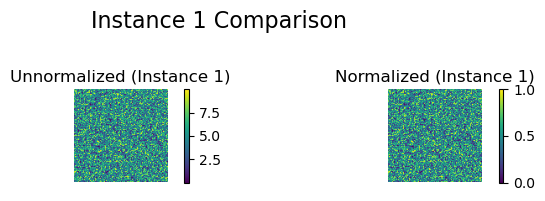

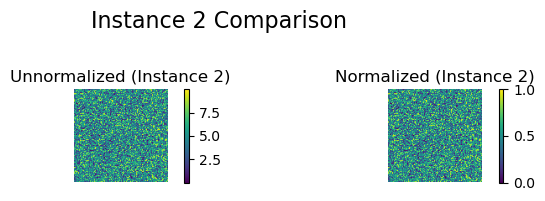

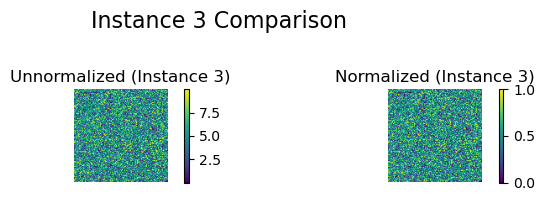

In [42]:
# Call the comparer:
if flag_plot: plot_comparison(use_X_vl, nrm_X_vl, instances=3)